In [1]:
# generative model
from src.SlovotvirModelM import run_model_parallel

# bayesflow components
import bayesflow.diagnostics as diag

# helpher functions
from src.helpers import (generate_latex_table,
                         binning,
                         plot_posterior,
                         train_and_amortize, 
                         letter_subplots)

# other
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

/opt/homebrew/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
RNG = np.random.default_rng(2023)

## Inference of all 3 parameters

In [3]:
train_size = 1000
test_size = 10
valid_size = 10

### 1. Generating training and testing data

In [4]:
# training_params = (np.random.uniform(0, 10, train_size), np.random.uniform(0, 10, train_size), np.random.lognormal(0, 0.5, train_size))
# testing_params = (np.random.uniform(0, 10, test_size), np.random.uniform(0, 10, test_size), np.random.lognormal(0, 0.5, test_size))
# validation_params = (np.random.uniform(0, 10, valid_size), np.random.uniform(0, 10, valid_size), np.random.lognormal(0, 0.5, valid_size))

In [5]:
# training_data = run_model_parallel(training_params[0], training_params[1], training_params[2], train_size)

In [6]:
# testing_data = run_model_parallel(testing_params[0], testing_params[1], testing_params[2], test_size)

In [7]:
# validation_data = run_model_parallel(validation_params[0], validation_params[1], validation_params[2], valid_size)

In [8]:
# training_params = np.vstack(training_params)
# testing_params = np.vstack(testing_params)
# validation_params = np.vstack(validation_params)

In [9]:
# train_data = {}
# train_data["prior_non_batchable_context"] = None
# train_data["prior_batchable_context"] = None
# train_data["prior_draws"] = training_params.reshape(num_params, train_size).T
# train_data["sim_non_batchable_context"] = None
# train_data["sim_batchable_context"] = None
# train_data["sim_data"] = np.array(training_data, dtype = float)


# test_data = {}
# test_data["prior_non_batchable_context"] = None
# test_data["prior_batchable_context"] = None
# test_data["prior_draws"] = testing_params.reshape(num_params, test_size).T
# test_data["sim_non_batchable_context"] = None
# test_data["sim_batchable_context"] = None
# test_data["sim_data"] = np.array(testing_data, dtype = float)

# valid_data = {}
# valid_data["prior_non_batchable_context"] = None
# valid_data["prior_batchable_context"] = None
# valid_data["prior_draws"] = validation_params.reshape(num_params, valid_size).T
# valid_data["sim_non_batchable_context"] = None
# valid_data["sim_batchable_context"] = None
# valid_data["sim_data"] = np.array(validation_data, dtype = float)

In [10]:
# pickle.dump(train_data, open("data/train_data_1405.pkl", "wb"))
# pickle.dump(test_data, open("data/test_data_1405.pkl", "wb"))
# pickle.dump(valid_data, open("data/valid_data_1405.pkl", "wb"))
# load data
train_data = pickle.load(open("data/train_data_1405.pkl", "rb"))
test_data = pickle.load(open("data/test_data_1405.pkl", "rb"))
valid_data = pickle.load(open("data/valid_data_1405.pkl", "rb"))

In [11]:
# train_data_ = pickle.load(open("data/train_data_1205.pkl", "rb"))
# test_data_ = pickle.load(open("data/test_data_1205.pkl", "rb"))
# valid_data_ = pickle.load(open("data/valid_data_1205.pkl", "rb"))

In [12]:
# # train_data["sim_data"].shape
# train_data_["sim_data"] = np.array(list(map(binning, train_data_["sim_data"])))
# test_data_["sim_data"] = np.array(list(map(binning, test_data_["sim_data"])))
# valid_data_["sim_data"] = np.array(list(map(binning, valid_data_["sim_data"])))

In [13]:
# # combine sim_data and prior_draws
# train_data["sim_data"] = np.concatenate((train_data["sim_data"], train_data_["sim_data"]))
# train_data["prior_draws"] = np.concatenate((train_data["prior_draws"], train_data_["prior_draws"]))
# test_data["sim_data"] = np.concatenate((test_data["sim_data"], test_data_["sim_data"]))
# test_data["prior_draws"] = np.concatenate((test_data["prior_draws"], test_data_["prior_draws"]))
# valid_data["sim_data"] = np.concatenate((valid_data["sim_data"], valid_data_["sim_data"]))
# valid_data["prior_draws"] = np.concatenate((valid_data["prior_draws"], valid_data_["prior_draws"]))

In [14]:
# # apply binning to each entry in sim_data using map
# train_data["sim_data"] = np.array(list(map(binning, train_data["sim_data"])))
# test_data["sim_data"] = np.array(list(map(binning, test_data["sim_data"])))
# valid_data["sim_data"] = np.array(list(map(binning, valid_data["sim_data"])))

In [15]:
prior_means = np.mean(train_data["prior_draws"], axis=0)
prior_stds = np.std(train_data["prior_draws"], axis=0)

In [16]:
train_data['sim_data'].shape

(80000, 17)

### 2. Training the model

In [17]:
num_params = 3
epochs = 100
batch_size = 32
learning_rate = 0.001

In [18]:
history, trainer, amortizer = train_and_amortize(train_data, batch_size, test_data, epochs, 
                                                 num_params, 4, learning_rate, prior_means, prior_stds)

INFO:root:Trainer initialization: No generative model provided. Only offline learning mode is available!


Training epoch 1:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 1, Loss: 1.387


Training epoch 2:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 2, Loss: 1.169


Training epoch 3:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 3, Loss: 0.814


Training epoch 4:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 4, Loss: 0.836


Training epoch 5:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 5, Loss: 1.339


Training epoch 6:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 6, Loss: 0.370


Training epoch 7:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 7, Loss: 0.422


Training epoch 8:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 8, Loss: 0.423


Training epoch 9:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 9, Loss: 0.189


Training epoch 10:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 10, Loss: -0.239


Training epoch 11:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 11, Loss: -0.561


Training epoch 12:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 12, Loss: -0.676


Training epoch 13:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 13, Loss: -0.746


Training epoch 14:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 14, Loss: -0.802


Training epoch 15:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 15, Loss: -0.961


Training epoch 16:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 16, Loss: -0.911


Training epoch 17:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 17, Loss: -1.019


Training epoch 18:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 18, Loss: -0.816


Training epoch 19:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 19, Loss: -0.810


Training epoch 20:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 20, Loss: -0.709


Training epoch 21:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 21, Loss: -0.996


Training epoch 22:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 22, Loss: -1.202


Training epoch 23:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 23, Loss: -1.077


Training epoch 24:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 24, Loss: -1.044


Training epoch 25:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 25, Loss: -0.796


Training epoch 26:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 26, Loss: -0.757


Training epoch 27:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 27, Loss: -0.285


Training epoch 28:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 28, Loss: -1.314


Training epoch 29:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 29, Loss: -1.243


Training epoch 30:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 30, Loss: -1.222


Training epoch 31:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 31, Loss: -0.871


Training epoch 32:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 32, Loss: -0.865


Training epoch 33:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 33, Loss: -1.108


Training epoch 34:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 34, Loss: -1.383


Training epoch 35:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 35, Loss: -1.426


Training epoch 36:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 36, Loss: -1.214


Training epoch 37:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 37, Loss: -1.165


Training epoch 38:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 38, Loss: -1.428


Training epoch 39:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 39, Loss: -1.525


Training epoch 40:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 40, Loss: -1.498


Training epoch 41:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 41, Loss: -1.153


Training epoch 42:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 42, Loss: -1.583


Training epoch 43:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 43, Loss: -1.458


Training epoch 44:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 44, Loss: -1.248


Training epoch 45:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 45, Loss: -1.540


Training epoch 46:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 46, Loss: -1.615


Training epoch 47:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 47, Loss: -1.621


Training epoch 48:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 48, Loss: -1.609


Training epoch 49:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 49, Loss: -1.548


Training epoch 50:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 50, Loss: -1.666


Training epoch 51:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 51, Loss: -1.594


Training epoch 52:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 52, Loss: -1.596


Training epoch 53:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 53, Loss: -1.685


Training epoch 54:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 54, Loss: -1.639


Training epoch 55:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 55, Loss: -1.693


Training epoch 56:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 56, Loss: -1.698


Training epoch 57:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 57, Loss: -1.314


Training epoch 58:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 58, Loss: -1.607


Training epoch 59:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 59, Loss: -1.727


Training epoch 60:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 60, Loss: -1.753


Training epoch 61:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 61, Loss: -1.822


Training epoch 62:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 62, Loss: -1.566


Training epoch 63:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 63, Loss: -1.876


Training epoch 64:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 64, Loss: -1.841


Training epoch 65:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 65, Loss: -1.925


Training epoch 66:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 66, Loss: -1.891


Training epoch 67:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 67, Loss: -1.866


Training epoch 68:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 68, Loss: -1.920


Training epoch 69:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 69, Loss: -1.952


Training epoch 70:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 70, Loss: -1.810


Training epoch 71:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 71, Loss: -1.973


Training epoch 72:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 72, Loss: -1.972


Training epoch 73:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 73, Loss: -1.881


Training epoch 74:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 74, Loss: -1.971


Training epoch 75:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 75, Loss: -1.996


Training epoch 76:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 76, Loss: -2.030


Training epoch 77:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 77, Loss: -2.048


Training epoch 78:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 78, Loss: -2.043


Training epoch 79:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 79, Loss: -2.038


Training epoch 80:   0%|          | 0/2500 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 80, Loss: -2.067
INFO:root:Early stopping triggered.


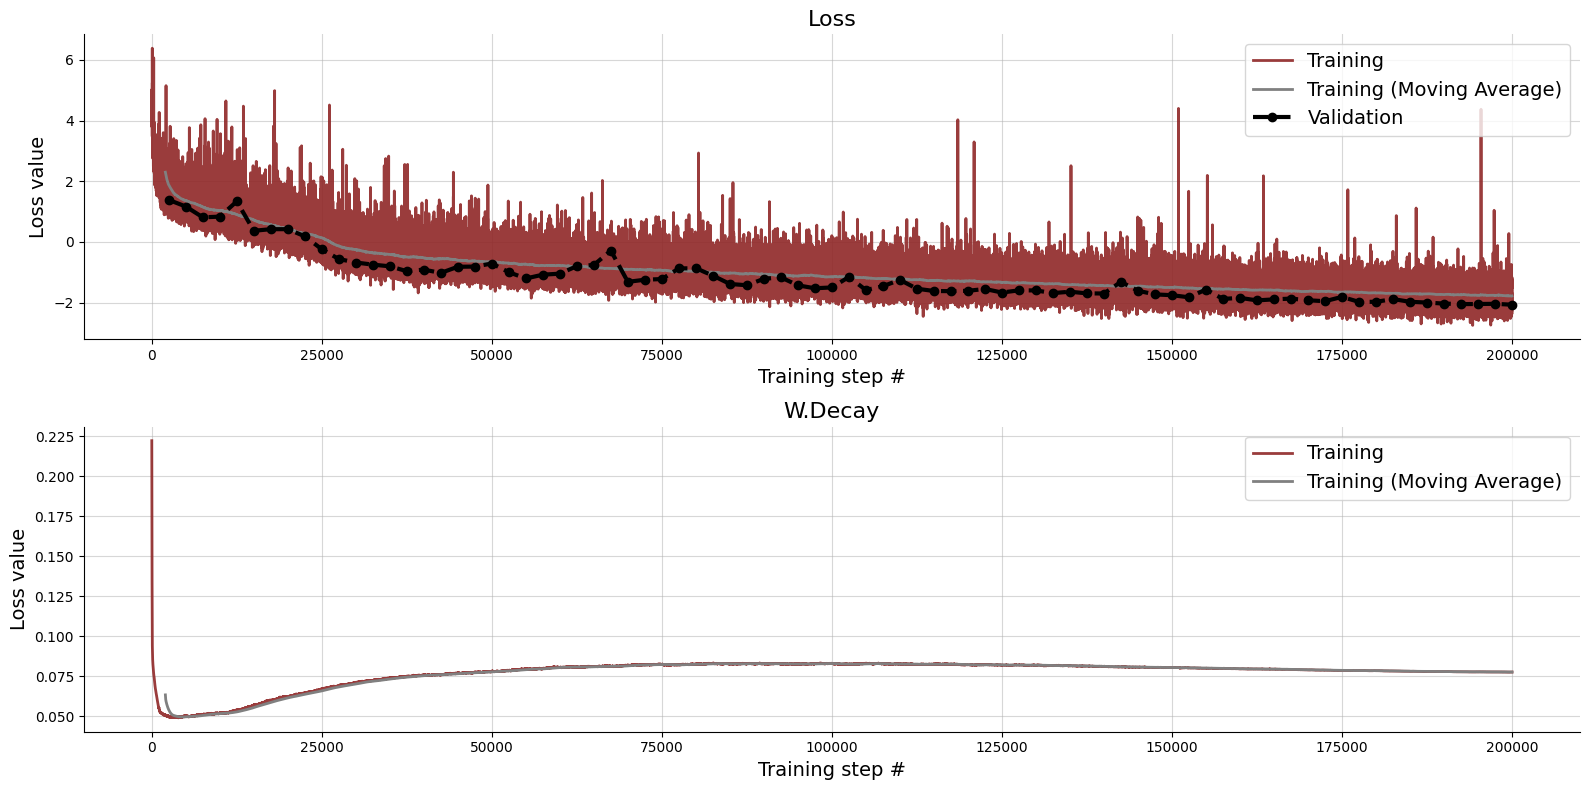

In [19]:
f = diag.plot_losses(history["train_losses"], history["val_losses"], moving_average=True)

### 3. Model analysis

In [20]:
# Generate some validation data
validation_sims = trainer.configurator(valid_data) 
prior_samples = validation_sims["parameters"] * prior_stds + prior_means
# Generate posterior draws for all simulations
post_samples = amortizer.sample(validation_sims, n_samples=100)
post_samples = post_samples * prior_stds + prior_means

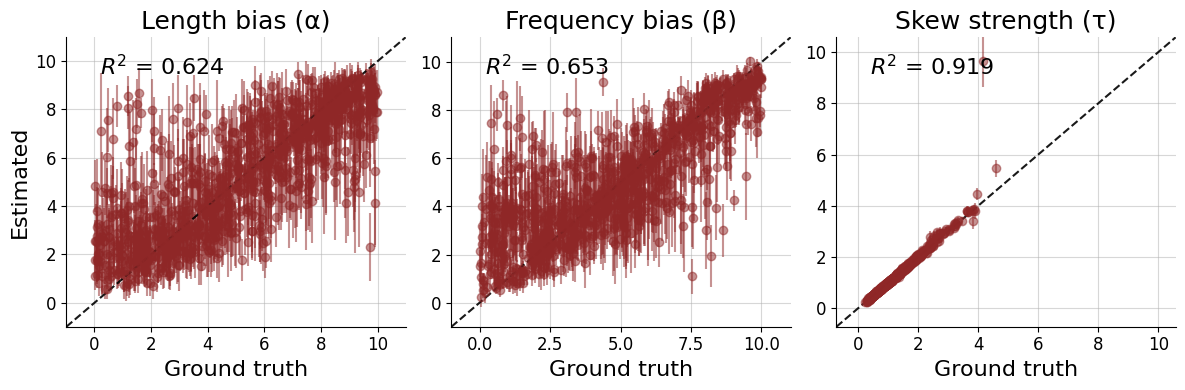

In [21]:
fig = diag.plot_recovery(post_samples[0:1000], prior_samples[0:1000], add_corr=False,
                         param_names=['Length bias (α)', 'Frequency bias (β)', 'Skew strength (τ)'],
                         )
# point_agg=np.mean, uncertainty_agg=np.std

In [22]:
post_samples.shape

(8000, 100, 3)

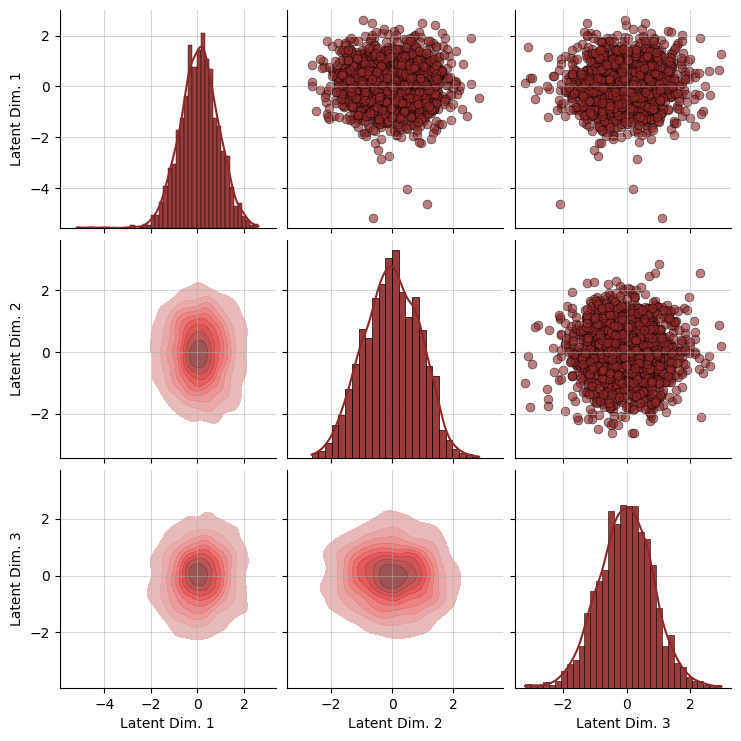

In [23]:
f = trainer.diagnose_latent2d()

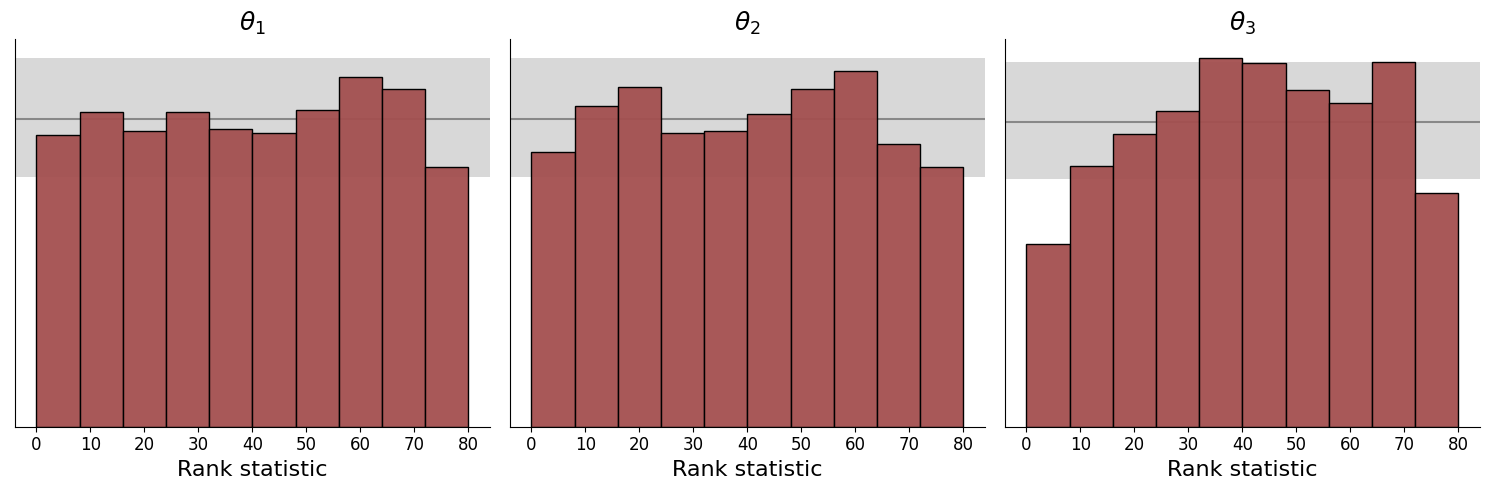

In [24]:
f = trainer.diagnose_sbc_histograms()

### 4. Posterior analysis

In [81]:
a = 10
b = 2
tau = 1

In [26]:
fake_dist = run_model_parallel([a], [b], [tau], 1)
# apply binning to each entry in sim_data using map
fake_dist = np.array(list(map(binning, fake_dist)))

In [27]:
obs_data = np.log1p(fake_dist[0])[np.newaxis, :, np.newaxis].astype(np.float32)

In [28]:
# Obtain 500 posterior draws given real data
post_samples_ = amortizer.sample({"summary_conditions": obs_data}, 10000)

# Undo standardization to get parameters on their original (unstandardized) scales
post_samples_ = prior_means + post_samples_ * prior_stds

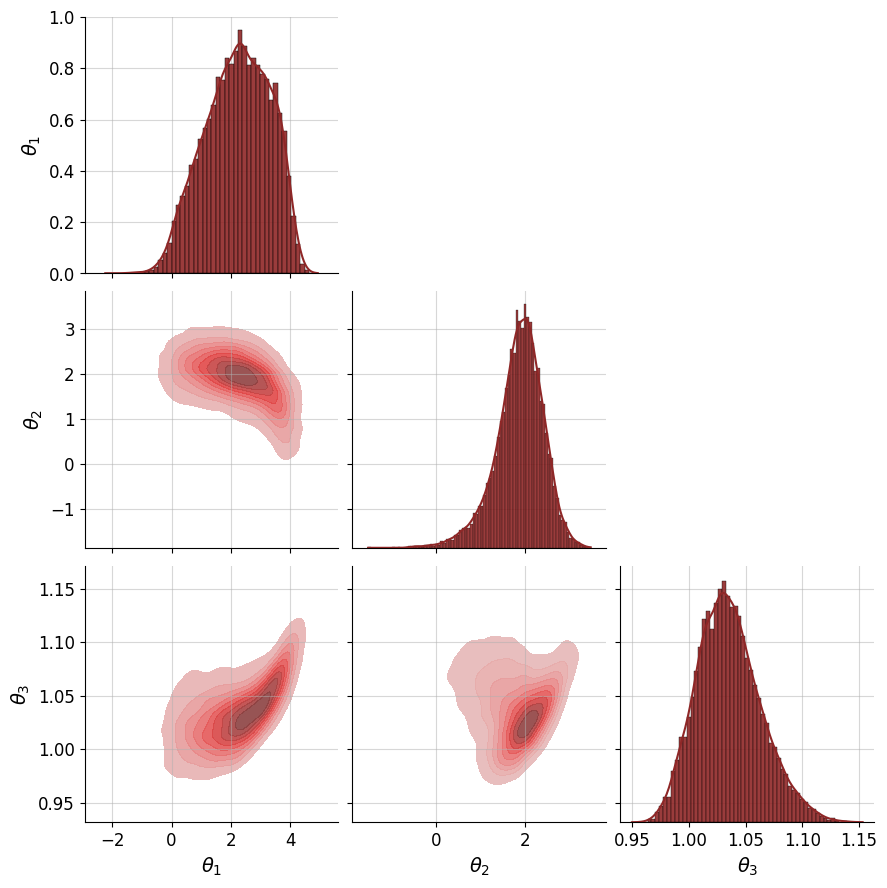

In [29]:
f = diag.plot_posterior_2d(post_samples_)

In [30]:
print(generate_latex_table(['Length bias (α)', 'Frequency bias (β)', 'Skew strength (τ)'], post_samples_))

\begin{tabular}{lrl}
\hline
 Parameter          &   Mean & HDI           \\
\hline
 Length bias (α)    &  2.224 & [0.219 4.109] \\
 Frequency bias (β) &  1.871 & [0.784 2.923] \\
 Skew strength (τ)  &  1.036 & [0.983 1.092] \\
\hline
\end{tabular}


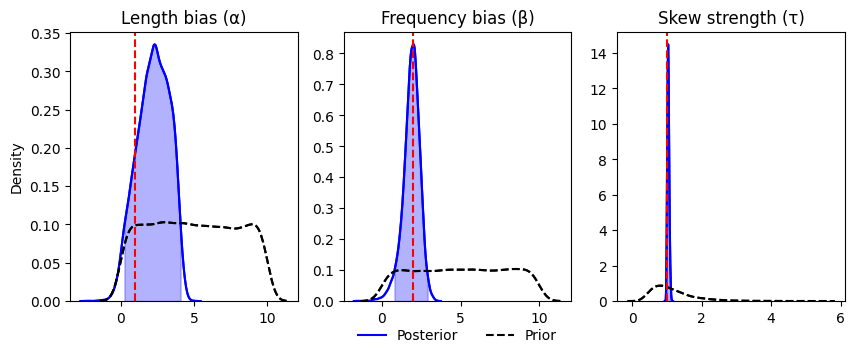

In [31]:
plot_posterior(post_samples_, ['Length bias (α)', 'Frequency bias (β)', 'Skew strength (τ)'], [a, b, tau], save=None)

In [32]:
# Perform PCA
pca = PCA(n_components=2, whiten=True)
pca_result = pca.fit_transform(train_data['sim_data'])

true_hist = obs_data.reshape(1, -1)
pca_true = pca.transform(true_hist)

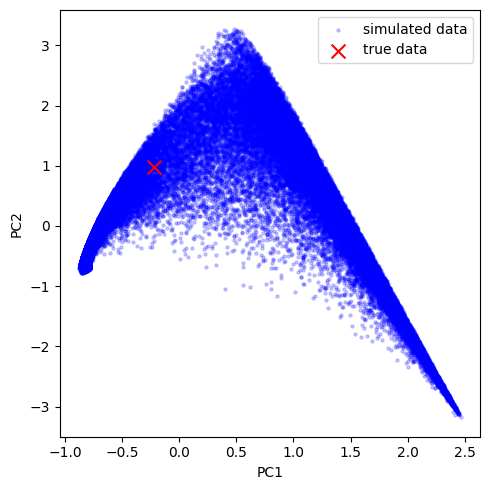

In [33]:
# Plot PCA
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], 
            s=5, color = 'blue', 
            alpha=0.2, label='simulated data')
plt.scatter(pca_true[:, 0], pca_true[:, 1],
             s=100, color='red', marker='x', 
             label='true data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.savefig('figures/pca.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

## Inference of alpha and beta knowing tau

### 1. Data generation

In [34]:
train_size = 20000
test_size = 2000
valid_size = 2000

num_params = 2

In [35]:
# np.mean(post_samples_[:, 2])

1.0356231557550513

In [36]:
training_params_2 = (np.random.uniform(0, 10, train_size), 
                   np.random.uniform(0, 10, train_size), 
                  [np.mean(post_samples_[:, 2])] * train_size)
testing_params_2 = (np.random.uniform(0, 10, test_size), 
                  np.random.uniform(0, 10, test_size), 
                 [np.mean(post_samples_[:, 2])] * test_size)
validation_params_2 = (np.random.uniform(0, 10, valid_size), 
                     np.random.uniform(0, 10, valid_size),
                    [np.mean(post_samples_[:, 2])] * valid_size)

In [37]:
training_data_2 = run_model_parallel(training_params_2[0], training_params_2[1], training_params_2[2], train_size)

In [38]:
testing_data_2 = run_model_parallel(testing_params_2[0], testing_params_2[1], testing_params_2[2], test_size)

In [39]:
validation_data_2 = run_model_parallel(validation_params_2[0], validation_params_2[1], validation_params_2[2], valid_size)

In [40]:
training_params_2 = np.vstack(training_params_2)
testing_params_2 = np.vstack(testing_params_2)
validation_params_2 = np.vstack(validation_params_2)

In [41]:
# remove last array from params
training_params_2 = training_params_2[:-1]
testing_params_2 = testing_params_2[:-1]
validation_params_2 = validation_params_2[:-1]

In [42]:
train_data_2 = {}
train_data_2["prior_non_batchable_context"] = None
train_data_2["prior_batchable_context"] = None
train_data_2["prior_draws"] = training_params_2.reshape(num_params, train_size).T
train_data_2["sim_non_batchable_context"] = None
train_data_2["sim_batchable_context"] = None
train_data_2["sim_data"] = np.array(training_data_2, dtype = float)


test_data_2 = {}
test_data_2["prior_non_batchable_context"] = None
test_data_2["prior_batchable_context"] = None
test_data_2["prior_draws"] = testing_params_2.reshape(num_params, test_size).T
test_data_2["sim_non_batchable_context"] = None
test_data_2["sim_batchable_context"] = None
test_data_2["sim_data"] = np.array(testing_data_2, dtype = float)

valid_data_2 = {}
valid_data_2["prior_non_batchable_context"] = None
valid_data_2["prior_batchable_context"] = None
valid_data_2["prior_draws"] = validation_params_2.reshape(num_params, valid_size).T
valid_data_2["sim_non_batchable_context"] = None
valid_data_2["sim_batchable_context"] = None
valid_data_2["sim_data"] = np.array(validation_data_2, dtype = float)

In [43]:
pickle.dump(train_data_2, open("data/train_data_1505_no_tau.pkl", "wb"))
pickle.dump(test_data_2, open("data/test_data_1505_no_tau.pkl", "wb"))
pickle.dump(valid_data_2, open("data/valid_data_1505_no_tau.pkl", "wb"))

In [44]:
# train_data["sim_data"].shape
train_data_2["sim_data"] = np.array(list(map(binning, train_data_2["sim_data"])))
test_data_2["sim_data"] = np.array(list(map(binning, test_data_2["sim_data"])))
valid_data_2["sim_data"] = np.array(list(map(binning, valid_data_2["sim_data"])))

In [45]:
prior_means_2 = np.mean(train_data_2["prior_draws"], axis=0)
prior_stds_2 = np.std(train_data_2["prior_draws"], axis=0)

### 2. Model training

In [86]:
num_params = 2
epochs = 200
batch_size = 32
learning_rate = 0.001

history_2, trainer_2, amortizer_2 = train_and_amortize(train_data_2, batch_size, test_data_2, 
                                                       epochs, num_params, 4, learning_rate, prior_means_2, prior_stds_2)

INFO:root:Trainer initialization: No generative model provided. Only offline learning mode is available!


Training epoch 1:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 1, Loss: 2.053


Training epoch 2:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 2, Loss: 2.056


Training epoch 3:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 3, Loss: 1.977


Training epoch 4:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 4, Loss: 1.734


Training epoch 5:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 5, Loss: 1.938


Training epoch 6:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 6, Loss: 1.535


Training epoch 7:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 7, Loss: 1.534


Training epoch 8:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 8, Loss: 1.329


Training epoch 9:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 9, Loss: 1.270


Training epoch 10:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 10, Loss: 1.801


Training epoch 11:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 11, Loss: 0.875


Training epoch 12:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 12, Loss: 1.169


Training epoch 13:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 13, Loss: 1.158


Training epoch 14:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 14, Loss: 0.708


Training epoch 15:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 15, Loss: 1.572


Training epoch 16:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 16, Loss: 1.432


Training epoch 17:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 17, Loss: 0.891


Training epoch 18:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 18, Loss: 0.700


Training epoch 19:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 19, Loss: 0.532


Training epoch 20:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 20, Loss: 0.633


Training epoch 21:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 21, Loss: 0.287


Training epoch 22:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 22, Loss: 0.281


Training epoch 23:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 23, Loss: 0.307


Training epoch 24:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 24, Loss: 0.471


Training epoch 25:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 25, Loss: 0.355


Training epoch 26:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 26, Loss: 0.709


Training epoch 27:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 27, Loss: 0.246


Training epoch 28:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 28, Loss: 0.571


Training epoch 29:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 29, Loss: 0.025


Training epoch 30:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 30, Loss: 0.155


Training epoch 31:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 31, Loss: 0.160


Training epoch 32:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 32, Loss: 0.258


Training epoch 33:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 33, Loss: 0.143


Training epoch 34:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 34, Loss: 0.117


Training epoch 35:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 35, Loss: -0.059


Training epoch 36:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 36, Loss: 0.127


Training epoch 37:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 37, Loss: 0.592


Training epoch 38:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 38, Loss: -0.042


Training epoch 39:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 39, Loss: -0.084


Training epoch 40:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 40, Loss: 0.136


Training epoch 41:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 41, Loss: -0.204


Training epoch 42:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 42, Loss: -0.251


Training epoch 43:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 43, Loss: -0.001


Training epoch 44:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 44, Loss: -0.128


Training epoch 45:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 45, Loss: 0.160


Training epoch 46:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 46, Loss: -0.275


Training epoch 47:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 47, Loss: -0.379


Training epoch 48:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 48, Loss: -0.305


Training epoch 49:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 49, Loss: -0.336


Training epoch 50:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 50, Loss: 0.100


Training epoch 51:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 51, Loss: -0.353


Training epoch 52:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 52, Loss: -0.384


Training epoch 53:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 53, Loss: -0.279


Training epoch 54:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 54, Loss: -0.353


Training epoch 55:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 55, Loss: -0.398


Training epoch 56:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 56, Loss: -0.231


Training epoch 57:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 57, Loss: -0.194


Training epoch 58:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 58, Loss: -0.273


Training epoch 59:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 59, Loss: -0.470


Training epoch 60:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 60, Loss: -0.330


Training epoch 61:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 61, Loss: -0.392


Training epoch 62:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 62, Loss: -0.549


Training epoch 63:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 63, Loss: -0.111


Training epoch 64:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 64, Loss: -0.566


Training epoch 65:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 65, Loss: -0.474


Training epoch 66:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 66, Loss: -0.509


Training epoch 67:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 67, Loss: -0.437


Training epoch 68:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 68, Loss: -0.601


Training epoch 69:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 69, Loss: -0.648


Training epoch 70:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 70, Loss: -0.086


Training epoch 71:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 71, Loss: -0.447


Training epoch 72:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 72, Loss: -0.555


Training epoch 73:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 73, Loss: -0.663


Training epoch 74:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 74, Loss: -0.580


Training epoch 75:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 75, Loss: -0.536


Training epoch 76:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 76, Loss: -0.704


Training epoch 77:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 77, Loss: -0.392


Training epoch 78:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 78, Loss: -0.657


Training epoch 79:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 79, Loss: -0.705


Training epoch 80:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 80, Loss: -0.533


Training epoch 81:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 81, Loss: -0.577


Training epoch 82:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 82, Loss: -0.436


Training epoch 83:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 83, Loss: -0.730


Training epoch 84:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 84, Loss: -0.664


Training epoch 85:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 85, Loss: -0.682


Training epoch 86:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 86, Loss: -0.765


Training epoch 87:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 87, Loss: -0.646


Training epoch 88:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 88, Loss: -0.743


Training epoch 89:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 89, Loss: -0.801


Training epoch 90:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 90, Loss: -0.670


Training epoch 91:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 91, Loss: -0.874


Training epoch 92:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 92, Loss: -0.860


Training epoch 93:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 93, Loss: -0.837


Training epoch 94:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 94, Loss: -0.765


Training epoch 95:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 95, Loss: -0.571


Training epoch 96:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 96, Loss: -0.664


Training epoch 97:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 97, Loss: -0.833


Training epoch 98:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 98, Loss: -0.684


Training epoch 99:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 99, Loss: -0.883


Training epoch 100:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 100, Loss: -0.728


Training epoch 101:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 101, Loss: -0.793


Training epoch 102:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 102, Loss: -0.868


Training epoch 103:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 103, Loss: -0.920


Training epoch 104:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 104, Loss: -0.733


Training epoch 105:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 105, Loss: -0.909


Training epoch 106:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 106, Loss: -0.849


Training epoch 107:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 107, Loss: -0.972


Training epoch 108:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 108, Loss: -0.977


Training epoch 109:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 109, Loss: -0.993


Training epoch 110:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 110, Loss: -0.844


Training epoch 111:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 111, Loss: -1.009


Training epoch 112:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 112, Loss: -1.071


Training epoch 113:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 113, Loss: -0.651


Training epoch 114:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 114, Loss: -0.863


Training epoch 115:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 115, Loss: -0.902


Training epoch 116:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 116, Loss: -1.011


Training epoch 117:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 117, Loss: -0.838


Training epoch 118:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 118, Loss: -1.020


Training epoch 119:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 119, Loss: -0.966


Training epoch 120:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 120, Loss: -0.930


Training epoch 121:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 121, Loss: -1.056


Training epoch 122:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 122, Loss: -0.972


Training epoch 123:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 123, Loss: -1.020


Training epoch 124:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 124, Loss: -1.036


Training epoch 125:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 125, Loss: -1.116


Training epoch 126:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 126, Loss: -1.083


Training epoch 127:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 127, Loss: -1.097


Training epoch 128:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 128, Loss: -1.089


Training epoch 129:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 129, Loss: -1.103


Training epoch 130:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 130, Loss: -1.044


Training epoch 131:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 131, Loss: -1.111


Training epoch 132:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 132, Loss: -1.089


Training epoch 133:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 133, Loss: -1.073


Training epoch 134:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 134, Loss: -1.138


Training epoch 135:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 135, Loss: -1.174


Training epoch 136:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 136, Loss: -1.095


Training epoch 137:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 137, Loss: -1.089


Training epoch 138:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 138, Loss: -1.081


Training epoch 139:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 139, Loss: -1.042


Training epoch 140:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 140, Loss: -1.106


Training epoch 141:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 141, Loss: -1.159


Training epoch 142:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 142, Loss: -1.138


Training epoch 143:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 143, Loss: -1.079


Training epoch 144:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 144, Loss: -1.121


Training epoch 145:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 145, Loss: -1.171


Training epoch 146:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 146, Loss: -1.139


Training epoch 147:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 147, Loss: -1.194


Training epoch 148:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 148, Loss: -1.194


Training epoch 149:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 149, Loss: -1.179


Training epoch 150:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 150, Loss: -1.167


Training epoch 151:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 151, Loss: -1.172


Training epoch 152:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 152, Loss: -1.173


Training epoch 153:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 153, Loss: -1.147
INFO:root:Early stopping triggered.


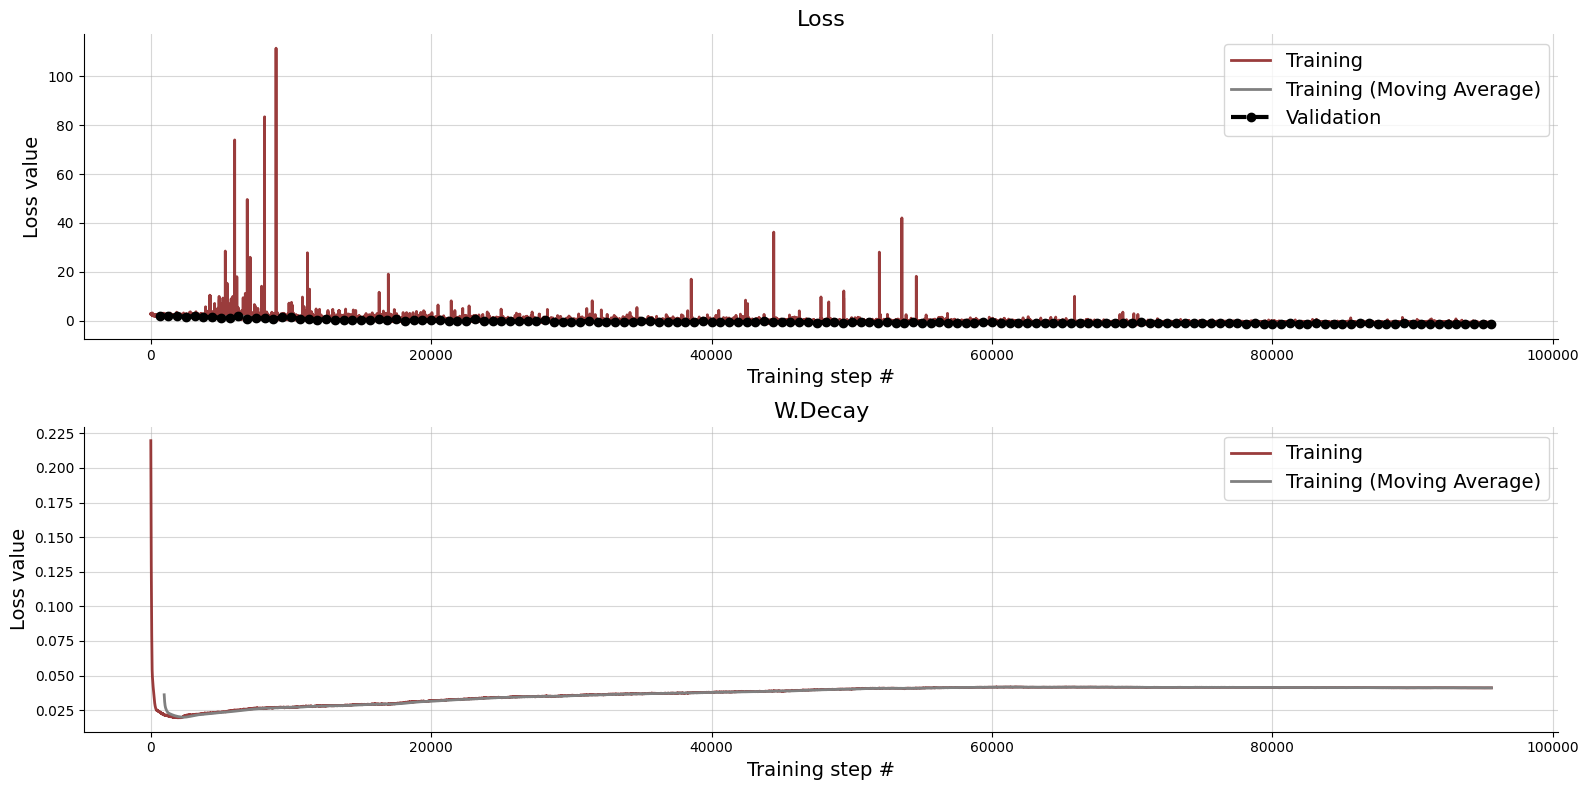

In [87]:
f = diag.plot_losses(history_2["train_losses"], history_2["val_losses"], moving_average=True)

In [96]:
# Generate some validation data
validation_sims = trainer_2.configurator(valid_data_2) 
prior_samples = validation_sims["parameters"] * prior_stds_2 + prior_means_2
# Generate posterior draws for all simulations
post_samples = amortizer_2.sample(validation_sims, n_samples=100)
post_samples = post_samples * prior_stds_2 + prior_means_2

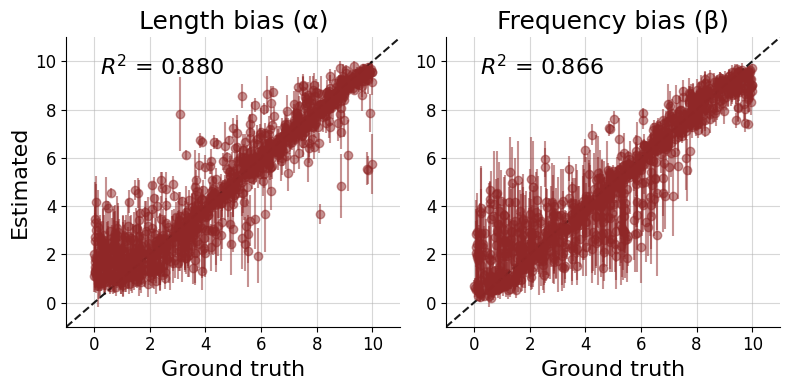

In [97]:
fig = diag.plot_recovery(post_samples[0:1000], prior_samples[0:1000], add_corr=False,
                         param_names=['Length bias (α)', 'Frequency bias (β)'],
                         )
# point_agg=np.mean, uncertainty_agg=np.std

### 4. Posterior analysis

In [116]:
a = 5
b = 5
# tau = np.mean(post_samples_[:, 2])
tau = 1.0356231557550513

In [117]:
fake_dist = run_model_parallel([a], [b], [tau], 1)
fake_dist = np.array(list(map(binning, fake_dist)))

In [118]:
obs_data = np.log1p(fake_dist[0])[np.newaxis, :, np.newaxis].astype(np.float32)

In [119]:
# Obtain 500 posterior draws given real data
post_samples_ = amortizer_2.sample({"summary_conditions": obs_data}, 10000)

# Undo standardization to get parameters on their original (unstandardized) scales
post_samples_ = prior_means_2 + post_samples_ * prior_stds_2

In [120]:
print(generate_latex_table(['Length bias (α)', 'Frequency bias (β)'], post_samples_))

\begin{tabular}{lrl}
\hline
 Parameter          &   Mean & HDI           \\
\hline
 Length bias (α)    &  5.526 & [4.12  6.501] \\
 Frequency bias (β) &  4.142 & [2.092 5.19 ] \\
\hline
\end{tabular}


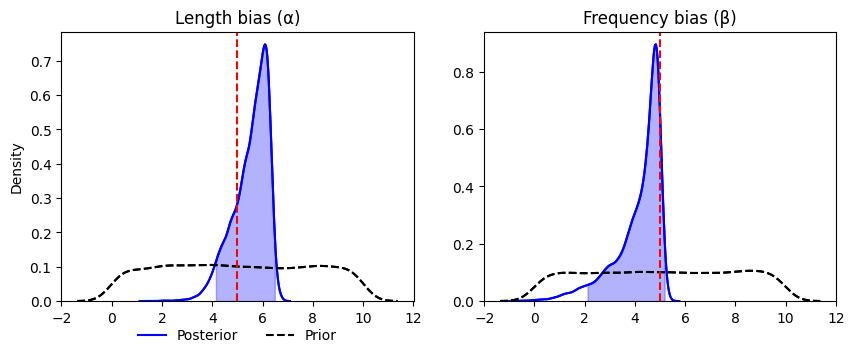

In [121]:
plot_posterior(post_samples_, ['Length bias (α)', 'Frequency bias (β)'], [a, b], save=None)